In [1]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
from OptWind import windOpt_linear
from OptJoint import jointOpt_linear
from OptStorage import storageOpt_linear
from OptJoint import jointOpt_linear_noArb
from OptDisjoint import disjointOpt_linear
import matplotlib.pyplot as plt

In [2]:
res_profile = np.load('./Interresult/solar_summer.npz')['data']
netload_profile = np.load('./Interresult/loadnet_summer.npz')['data']
T = len(netload_profile)
alpha = np.zeros(T)
beta_base = np.zeros(T)
for i, d in enumerate(netload_profile):
    if d>=10.9 and d<=51.0:
        alpha[i] = 25.94 + 0.12 *d
        beta_base[i] = 0.12 
    elif d> 51.0 and d<= 58.0:
        alpha[i] = -82.25 + 2.28 *d
        beta_base[i] = 2.28
    elif d>=58.0 and d<= 67.8:
        alpha[i] =  -0.47 + 0.8 *d
        beta_base[i] = 0.8
    else:
        print('ERROR!')
beta= np.diag(beta_base)
s_cap = 2
w_cap = 2
s_ub = s_cap* np.ones(T)
s_ub[-1] = s_ub[-1] - 0.5*s_cap
s_lb = 0* np.ones(T)
s_lb[-1] = s_lb[-1] + 0.5*s_cap
s_init = np.zeros(T)
s_init[0] = 0.5 * s_cap
eta_c = 1
eta_d = 1

# w_cap = 2
w_true = res_profile * w_cap /100
w_true_1 = w_true

w_j, x_j, s, m = jointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_j = alpha-(w_j+x_j)@beta
w_n, x_n, s_n, m_n = jointOpt_linear_noArb(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_n = alpha-(w_n+x_n)@beta
w2_linear, m2_linear = windOpt_linear(T, alpha, beta, w_true)
price_ori = alpha-(w2_linear)@beta
eps = 1e-3
kUb = 10
w_sol_try, x_sol_try, m_disjoint_wind_try, m_disjoint_storage_try=disjointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d, eps, kUb)
price_d = alpha-(w_sol_try+ x_sol_try)@beta

w_j_1 =w_j
x_j_1 =x_j
price_j_1 = price_j
w_n_1 =w_n
x_n_1 =x_n
price_n_1 = price_n
w2_linear_1 = w2_linear
price_ori_1 = price_ori
w_sol_try_1 = w_sol_try
x_sol_try_1 = x_sol_try
price_d_1 = price_d

In [3]:
res_profile = np.load('./Interresult/wind_summer.npz')['data']
netload_profile = np.load('./Interresult/loadnet_summer.npz')['data']
T = len(netload_profile)
alpha = np.zeros(T)
beta_base = np.zeros(T)
for i, d in enumerate(netload_profile):
    if d>=10.9 and d<=51.0:
        alpha[i] = 25.94 + 0.12 *d
        beta_base[i] = 0.12 
    elif d> 51.0 and d<= 58.0:
        alpha[i] = -82.25 + 2.28 *d
        beta_base[i] = 2.28
    elif d>=58.0 and d<= 67.8:
        alpha[i] =  -0.47 + 0.8 *d
        beta_base[i] = 0.8
    else:
        print('ERROR!')
beta= np.diag(beta_base)
s_cap = 2
w_cap = 2
s_ub = s_cap* np.ones(T)
s_ub[-1] = s_ub[-1] - 0.5*s_cap
s_lb = 0* np.ones(T)
s_lb[-1] = s_lb[-1] + 0.5*s_cap
s_init = np.zeros(T)
s_init[0] = 0.5 * s_cap
eta_c = 1
eta_d = 1

# w_cap = 2
w_true = res_profile * w_cap /100
w_true_2= w_true

w_j, x_j, s, m = jointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_j = alpha-(w_j+x_j)@beta
w_n, x_n, s_n, m_n = jointOpt_linear_noArb(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_n = alpha-(w_n+x_n)@beta
w2_linear, m2_linear = windOpt_linear(T, alpha, beta, w_true)
price_ori = alpha-(w2_linear)@beta
eps = 1e-3
kUb = 10
w_sol_try, x_sol_try, m_disjoint_wind_try, m_disjoint_storage_try=disjointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d, eps, kUb)
price_d = alpha-(w_sol_try+ x_sol_try)@beta

w_j_2 =w_j
x_j_2 =x_j
price_j_2 = price_j
w_n_2 =w_n
x_n_2 =x_n
price_n_2 = price_n
w2_linear_2 = w2_linear
price_ori_2 = price_ori
w_sol_try_2 = w_sol_try
x_sol_try_2 = x_sol_try
price_d_2 = price_d

In [4]:
res_profile = np.load('./Interresult/solar_winter.npz')['data']
netload_profile = np.load('./Interresult/loadnet_winter.npz')['data']
T = len(netload_profile)
alpha = np.zeros(T)
beta_base = np.zeros(T)
for i, d in enumerate(netload_profile):
    if d>=10.9 and d<=51.0:
        alpha[i] = 25.94 + 0.12 *d
        beta_base[i] = 0.12 
    elif d> 51.0 and d<= 58.0:
        alpha[i] = -82.25 + 2.28 *d
        beta_base[i] = 2.28
    elif d>=58.0 and d<= 67.8:
        alpha[i] =  -0.47 + 0.8 *d
        beta_base[i] = 0.8
    else:
        print('ERROR!')
beta= np.diag(beta_base)
s_cap = 2
w_cap = 2
s_ub = s_cap* np.ones(T)
s_ub[-1] = s_ub[-1] - 0.5*s_cap
s_lb = 0* np.ones(T)
s_lb[-1] = s_lb[-1] + 0.5*s_cap
s_init = np.zeros(T)
s_init[0] = 0.5 * s_cap
eta_c = 1
eta_d = 1

# w_cap = 2
w_true = res_profile * w_cap /100
w_true_3 = w_true

w_j, x_j, s, m = jointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_j = alpha-(w_j+x_j)@beta
w_n, x_n, s_n, m_n = jointOpt_linear_noArb(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_n = alpha-(w_n+x_n)@beta
w2_linear, m2_linear = windOpt_linear(T, alpha, beta, w_true)
price_ori = alpha-(w2_linear)@beta
eps = 1e-3
kUb = 10
w_sol_try, x_sol_try, m_disjoint_wind_try, m_disjoint_storage_try=disjointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d, eps, kUb)
price_d = alpha-(w_sol_try+ x_sol_try)@beta

w_j_3 =w_j
x_j_3 =x_j
price_j_3 = price_j
w_n_3 =w_n
x_n_3 =x_n
price_n_3 = price_n
w2_linear_3 = w2_linear
price_ori_3 = price_ori
w_sol_try_3 = w_sol_try
x_sol_try_3 = x_sol_try
price_d_3 = price_d

In [5]:
res_profile = np.load('./Interresult/wind_winter.npz')['data']
netload_profile = np.load('./Interresult/loadnet_winter.npz')['data']
T = len(netload_profile)
alpha = np.zeros(T)
beta_base = np.zeros(T)
for i, d in enumerate(netload_profile):
    if d>=10.9 and d<=51.0:
        alpha[i] = 25.94 + 0.12 *d
        beta_base[i] = 0.12 
    elif d> 51.0 and d<= 58.0:
        alpha[i] = -82.25 + 2.28 *d
        beta_base[i] = 2.28
    elif d>=58.0 and d<= 67.8:
        alpha[i] =  -0.47 + 0.8 *d
        beta_base[i] = 0.8
    else:
        print('ERROR!')
beta= np.diag(beta_base)
s_cap = 2
w_cap = 2
s_ub = s_cap* np.ones(T)
s_ub[-1] = s_ub[-1] - 0.5*s_cap
s_lb = 0* np.ones(T)
s_lb[-1] = s_lb[-1] + 0.5*s_cap
s_init = np.zeros(T)
s_init[0] = 0.5 * s_cap
eta_c = 1
eta_d = 1

# w_cap = 2
w_true = res_profile * w_cap /100
w_true_4 = w_true

w_j, x_j, s, m = jointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_j = alpha-(w_j+x_j)@beta
w_n, x_n, s_n, m_n = jointOpt_linear_noArb(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d)
price_n = alpha-(w_n+x_n)@beta
w2_linear, m2_linear = windOpt_linear(T, alpha, beta, w_true)
price_ori = alpha-(w2_linear)@beta
eps = 1e-3
kUb = 10
w_sol_try, x_sol_try, m_disjoint_wind_try, m_disjoint_storage_try=disjointOpt_linear(T, alpha, beta, w_true, s_ub, s_lb, s_init, eta_c, eta_d, eps, kUb)
price_d = alpha-(w_sol_try+ x_sol_try)@beta

w_j_4 =w_j
x_j_4 =x_j
price_j_4 = price_j
w_n_4 =w_n
x_n_4 =x_n
price_n_4 = price_n
w2_linear_4 = w2_linear
price_ori_4 = price_ori
w_sol_try_4 = w_sol_try
x_sol_try_4 = x_sol_try
price_d_4 = price_d

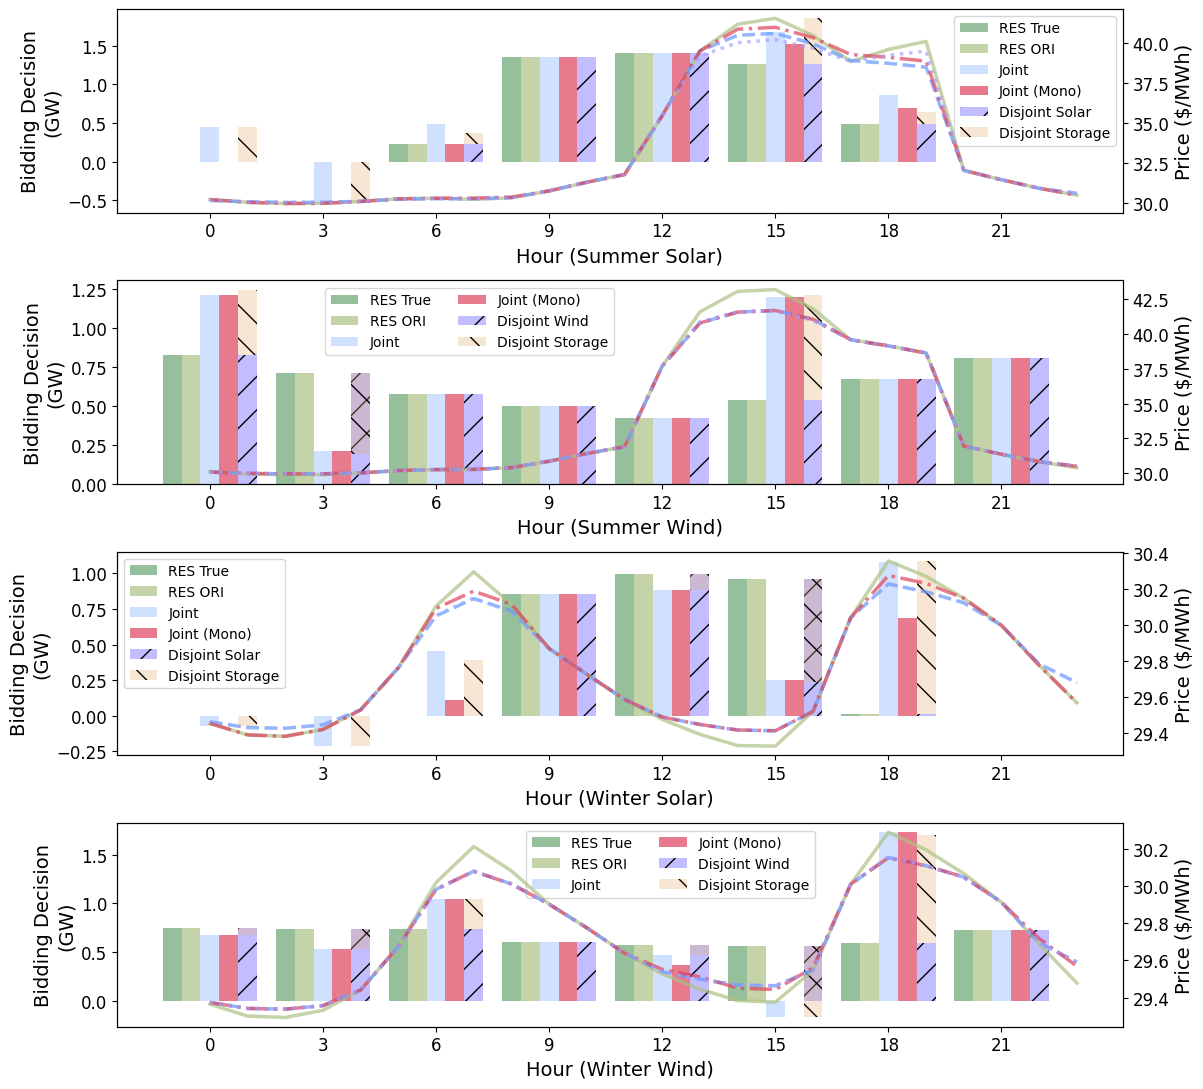

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 11))
width = 1
bar_alpha = 0.7
labels = np.arange(0,T,3)
x = labels  # the label locations
xx = range(T)
tax_0 = axes[0].twinx()
tax_0.plot(xx, price_ori_1,label='RES ORI',color='#adc184',linestyle='-',linewidth = 2.5, alpha=bar_alpha)
tax_0.plot(xx, price_j_1,label='Joint',color='#6699ff',linestyle='--',linewidth = 2.5, alpha=bar_alpha)
tax_0.plot(xx, price_n_1,label='Joint (Mono)',color='#de425b',linestyle='-.',linewidth = 2.5, alpha=bar_alpha)
tax_0.plot(xx, price_d_1,label='Disjoint',color='#a9a1ff',linestyle=':',linewidth = 2.5, alpha=bar_alpha)
rects1 = axes[0].bar(x - width, w_true_1[labels], width/2, label='RES True', alpha=bar_alpha, color="#6aa573")
rects2 = axes[0].bar(x - width/2, w2_linear_1[labels], width/2, label='RES ORI', alpha=bar_alpha, color="#adc184")
rects3 = axes[0].bar(x, w_j_1[labels]+x_j_1[labels], width/2, label='Joint', alpha=0.3, color="#6699ff")
rects4 = axes[0].bar(x + width/2, w_n_1[labels]+x_n_1[labels], width/2, label='Joint (Mono)', alpha=bar_alpha, color="#de425b") 
rects5 = axes[0].bar(x + width, w_sol_try_1[labels], width/2, label='Disjoint Solar', alpha=bar_alpha, color="#a9a1ff", hatch='/')
rects6 = axes[0].bar(x + width, x_sol_try_1[labels], width/2, w_sol_try_1[labels], label='Disjoint Storage', alpha=0.3, color="#e7ae70", hatch='\\')
# Add some text for labels, title and custom x-axis tick labels, etc.
axes[0].set_ylabel('Bidding Decision\n(GW)',fontsize=14)
tax_0.set_ylabel('Price ($/MWh)',fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xlabel('Hour (Summer Solar)',fontsize=14)
axes[0].set_xticklabels(labels,fontsize=12)
axes[0].tick_params(axis='y', labelsize=12)
tax_0.tick_params(axis='y', labelsize=12)
axes[0].legend(fontsize=10,loc="upper right")

width = 1
bar_alpha = 0.7
labels = np.arange(0,T,3)
x = labels  # the label locations
xx = range(T)
tax_1 = axes[1].twinx()
tax_1.plot(xx, price_ori_2,label='RES ORI',color='#adc184',linestyle='-',linewidth = 2.5, alpha=bar_alpha)
tax_1.plot(xx, price_j_2,label='Joint',color='#6699ff',linestyle='--',linewidth = 2.5, alpha=bar_alpha)
tax_1.plot(xx, price_n_2,label='Joint (Mono)',color='#de425b',linestyle='-.',linewidth = 2.5, alpha=bar_alpha)
tax_1.plot(xx, price_d_2,label='Disjoint',color='#a9a1ff',linestyle=':',linewidth = 2.5, alpha=bar_alpha)
rects1 = axes[1].bar(x - width, w_true_2[labels], width/2, label='RES True', alpha=bar_alpha, color="#6aa573")
rects2 = axes[1].bar(x - width/2, w2_linear_2[labels], width/2, label='RES ORI', alpha=bar_alpha, color="#adc184")
rects3 = axes[1].bar(x, w_j_2[labels]+x_j_2[labels], width/2, label='Joint', alpha=0.3, color="#6699ff")
rects4 = axes[1].bar(x + width/2, w_n_2[labels]+x_n_2[labels], width/2, label='Joint (Mono)', alpha=bar_alpha, color="#de425b") 
rects5 = axes[1].bar(x + width, w_sol_try_2[labels], width/2, label='Disjoint Wind', alpha=bar_alpha, color="#a9a1ff", hatch='/')
rects6 = axes[1].bar(x + width, x_sol_try_2[labels], width/2, w_sol_try_2[labels], label='Disjoint Storage', alpha=0.3, color="#e7ae70", hatch='\\')
# Add some 3text for labels, title and custom x-axis tick labels, etc.
axes[1].set_ylabel('Bidding Decision\n(GW)',fontsize=14)
tax_1.set_ylabel('Price ($/MWh)',fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xlabel('Hour (Summer Wind)',fontsize=14)
axes[1].set_xticklabels(labels,fontsize=12)
axes[1].tick_params(axis='y', labelsize=12)
tax_1.tick_params(axis='y', labelsize=12)
axes[1].legend(fontsize=10, ncol=2, bbox_to_anchor=(0.2, 0.6))

width = 1
bar_alpha = 0.7
labels = np.arange(0,T,3)
x = labels  # the label locations
xx = range(T)
tax_2 = axes[2].twinx()
tax_2.plot(xx, price_ori_3,label='RES ORI',color='#adc184',linestyle='-',linewidth = 2.5, alpha=bar_alpha)
tax_2.plot(xx, price_j_3,label='Joint',color='#6699ff',linestyle='--',linewidth = 2.5, alpha=bar_alpha)
tax_2.plot(xx, price_n_3,label='Joint (Mono)',color='#de425b',linestyle='-.',linewidth = 2.5, alpha=bar_alpha)
tax_2.plot(xx, price_d_3,label='Disjoint',color='#a9a1ff',linestyle=':',linewidth = 2.5, alpha=0.3)

rects1 = axes[2].bar(x - width, w_true_3[labels], width/2, label='RES True', alpha=bar_alpha, color="#6aa573")
rects2 = axes[2].bar(x - width/2, w2_linear_3[labels], width/2, label='RES ORI', alpha=bar_alpha, color="#adc184")
rects3 = axes[2].bar(x, w_j_3[labels]+x_j_3[labels], width/2, label='Joint', alpha=0.3, color="#6699ff")
rects4 = axes[2].bar(x + width/2, w_n_3[labels]+x_n_3[labels], width/2, label='Joint (Mono)', alpha=bar_alpha, color="#de425b") 
rects5 = axes[2].bar(x + width, w_sol_try_3[labels], width/2, label='Disjoint Solar', alpha=bar_alpha, color="#a9a1ff", hatch='/')
rects6 = axes[2].bar(x + width, x_sol_try_3[labels], width/2, w_sol_try_3[labels], label='Disjoint Storage', alpha=0.3, color="#e7ae70", hatch='\\')
# Add some text for labels, title and custom x-axis tick labels, etc.
axes[2].set_ylabel('Bidding Decision\n(GW)',fontsize=14)
tax_2.set_ylabel('Price ($/MWh)',fontsize=14)
axes[2].set_xticks(x)
axes[2].set_xlabel('Hour (Winter Solar)',fontsize=14)
axes[2].set_xticklabels(labels,fontsize=12)
axes[2].tick_params(axis='y', labelsize=12)
tax_2.tick_params(axis='y', labelsize=12)
axes[2].legend(fontsize=10,loc="upper left")

width = 1
bar_alpha = 0.7
labels = np.arange(0,T,3)
x = labels  # the label locations
xx = range(T)
tax_3 = axes[3].twinx()
tax_3.plot(xx, price_ori_4,label='RES ORI',color='#adc184',linestyle='-',linewidth = 2.5, alpha=bar_alpha)
tax_3.plot(xx, price_j_4,label='Joint',color='#6699ff',linestyle='--',linewidth = 2.5, alpha=bar_alpha)
tax_3.plot(xx, price_n_4,label='Joint (Mono)',color='#de425b',linestyle='-.',linewidth = 2.5, alpha=bar_alpha)
tax_3.plot(xx, price_d_4,label='Disjoint',color='#a9a1ff',linestyle=':',linewidth = 2.5, alpha=bar_alpha)

rects1 = axes[3].bar(x - width, w_true_4[labels], width/2, label='RES True', alpha=bar_alpha, color="#6aa573")
rects2 = axes[3].bar(x - width/2, w2_linear_4[labels], width/2, label='RES ORI', alpha=bar_alpha, color="#adc184")
rects3 = axes[3].bar(x, w_j_4[labels]+x_j_4[labels], width/2, label='Joint', alpha=0.3, color="#6699ff")
rects4 = axes[3].bar(x + width/2, w_n_4[labels]+x_n_4[labels], width/2, label='Joint (Mono)', alpha=bar_alpha, color="#de425b") 
rects5 = axes[3].bar(x + width, w_sol_try_4[labels], width/2, label='Disjoint Wind', alpha=bar_alpha, color="#a9a1ff", hatch='/')
rects6 = axes[3].bar(x + width, x_sol_try_4[labels], width/2, w_sol_try_4[labels], label='Disjoint Storage', alpha=0.3, color="#e7ae70", hatch='\\')
# Add some text for labels, title and custom x-axis tick labels, etc.
axes[3].set_ylabel('Bidding Decision\n(GW)',fontsize=14)
tax_3.set_ylabel('Price ($/MWh)',fontsize=14)
axes[3].set_xticks(x)
axes[3].set_xlabel('Hour (Winter Wind)',fontsize=14)
axes[3].set_xticklabels(labels,fontsize=12)
axes[3].tick_params(axis='y', labelsize=12)
tax_3.tick_params(axis='y', labelsize=12)
axes[3].legend(fontsize=10, ncol=2, bbox_to_anchor=(0.4, 0.6))
# ax2.legend(loc="lower right")
fig.tight_layout()
plt.savefig("./pics/R1/Action_all_try.pdf", bbox_inches='tight')